In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Creating the dataframe

In [2]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
train=pd.read_csv('D:/Train1.txt',sep=',',names=datacols)


In [4]:
test=pd.read_csv('D:/Test1.txt',sep=',',names=datacols)


In [5]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [6]:
test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


# Making the dependent variable(activity) where normal=0 and attack=1

In [7]:
# For train data
train['activity']=train.apply(lambda x: 0.0 if x['attack']=='normal' else 1.0 ,axis=1)

In [8]:
train.head()
train.shape

(125973, 44)

In [9]:
# for test data
test['activity']=test.apply(lambda x: 0.0 if x['attack']=='normal' else 1.0 ,axis=1)

In [10]:
test.head()
test.shape

(22544, 44)

In [11]:
train.drop(['attack'],axis=1,inplace=True)
test.drop(['attack'],axis=1,inplace=True)

In [12]:
train.shape


(125973, 43)

In [13]:
test.shape

(22544, 43)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
pandas_profiling.ProfileReport(train)

In [16]:
# Removing on the basis of high cardinality(service) and almost all zeroes from pandas profiling
train.drop(['service','num_root','num_outbound_cmds','num_file_creations','num_failed_logins','num_access_files'],axis=1,inplace=True)
test.drop(['service','num_root','num_outbound_cmds','num_file_creations','num_failed_logins','num_access_files'],axis=1,inplace=True)

In [17]:
 train.dtypes

duration                         int64
protocol_type                   object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_shells                       int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [18]:
# Splitting into numerical and categorical for train data
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64',]]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
train_num=train[numeric_var_names]
train_cat=train[cat_var_names]


In [19]:
# Outlier treatment
def outlier_capping(x):
    x = x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    return x

train_num=train_num.apply(lambda x: outlier_capping(x))

In [20]:
# creating dummy variables
cat_var=pd.get_dummies(train_cat,drop_first=True)

In [21]:
final_train=pd.concat([train_num,cat_var],axis=1)

In [22]:
# For test data
numeric_var_names=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64',]]
cat_var_names=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
test_num=test[numeric_var_names]
test_cat=test[cat_var_names]


In [23]:
# Outlier treatment
test_num=test_num.apply(lambda x: outlier_capping(x))

In [24]:
# creating the dummy variables
cat_var1=pd.get_dummies(test_cat,drop_first=True)

In [25]:
# concatinating both the cat and numerical variables
final_test=pd.concat([test_num,cat_var1],axis=1)

In [26]:
# Splitting train into y and x 
train_y=final_train['activity']


In [27]:
train_x=final_train.drop(['activity'],axis=1)

# Feature selection using random forest classifier

In [88]:
rfc=RandomForestClassifier()

In [89]:
rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

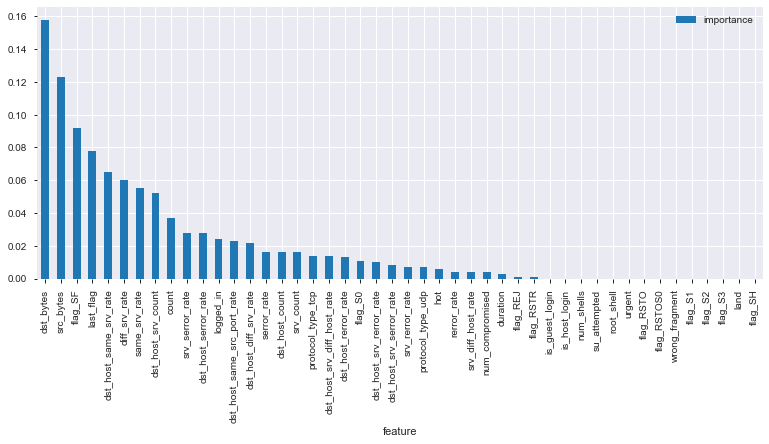

In [90]:
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (13,5)
importances.plot.bar()

# Using RFE

In [91]:
# Using RFE
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [92]:
selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'last_flag',
 'flag_SF']

# Removing on basis of VIF

In [28]:
rf_features=['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'last_flag',
 'flag_SF']

 

In [102]:
features = "+".join(rf_features)

In [103]:
y, X = dmatrices('activity~' + features,final_train, return_type='dataframe')

In [104]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [105]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,143.259499,Intercept
4,5.620599,same_srv_rate
9,3.529478,flag_SF
6,2.836724,dst_host_srv_count
3,1.712638,count
7,1.443833,dst_host_same_src_port_rate
8,1.414881,last_flag
5,1.222471,diff_srv_rate
2,1.162255,dst_bytes
1,1.127809,src_bytes


In [29]:
# Final train data
train_X=train_x[rf_features]

In [30]:
# Splitting the test data
test_X=final_test[rf_features]
test_y=final_test['activity']

# Using logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression


In [109]:
# Grid Search
param_grid={'C':[0.001,0.01,0.1,1,10,100]}


In [110]:
logreg=GridSearchCV(LogisticRegression(max_iter=500),param_grid,cv=5,verbose=5,n_jobs=-1)

In [111]:
logreg.fit(train_X,train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   41.2s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [113]:
# best params
logreg.best_params_

{'C': 0.1}

In [114]:
# Building the models with best params 
logmodel=LogisticRegression(C=0.1,max_iter=300)

In [115]:
logmodel.fit(train_X,train_y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluation metrics

In [116]:
# Checking the Gini Score
train_gini = 2*metrics.roc_auc_score(train_y, logmodel.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, logmodel.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9324052987304785
The Gini Index for the model built on the Test Data is :  0.7443130872457935


In [117]:
# Area Under The Curve
train_auc = metrics.roc_auc_score(train_y, logmodel.predict(train_X))
test_auc = metrics.roc_auc_score(test_y, logmodel.predict(test_X))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9662026493652393
The AUC for the model built on the Test Data is :  0.8721565436228967


In [118]:
# Accuracy Score
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, logmodel.predict(train_X)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, logmodel.predict(test_X)))

The overall accuracy score for the Train Data is :  0.9658339485445294
The overall accuracy score for the Test Data  is :  0.8662171753016323


In [119]:
# Confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,logmodel.predict(train_X))
confusion_matrix_test=metrics.confusion_matrix(test_y,logmodel.predict(test_X))

In [120]:
# for train
print(confusion_matrix_train)

[[64708  2635]
 [ 1669 56961]]


In [121]:
# for test
print(confusion_matrix_test)

[[ 8886   825]
 [ 2191 10642]]


In [122]:
# Classification Report for train
print(metrics.classification_report(train_y,logmodel.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     67343
         1.0       0.96      0.97      0.96     58630

    accuracy                           0.97    125973
   macro avg       0.97      0.97      0.97    125973
weighted avg       0.97      0.97      0.97    125973



In [123]:
# Classification Report for train
print(metrics.classification_report(test_y,logmodel.predict(test_X)))


              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85      9711
         1.0       0.93      0.83      0.88     12833

    accuracy                           0.87     22544
   macro avg       0.87      0.87      0.87     22544
weighted avg       0.87      0.87      0.87     22544



# Using Naive Bayes

In [32]:
import sklearn.naive_bayes as nb

In [33]:
naivemodel=nb.GaussianNB()

In [34]:
naivemodel.fit(train_X,train_y)

GaussianNB()

# Evaluation Metrics

In [35]:
# gini Score
train_gini = 2*metrics.roc_auc_score(train_y, naivemodel.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, naivemodel.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.8663954925194528
The Gini Index for the model built on the Test Data is :  0.7246315101139682


In [36]:
# AUC
train_auc = metrics.roc_auc_score(train_y, naivemodel.predict(train_X))
test_auc = metrics.roc_auc_score(test_y, naivemodel.predict(test_X))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9331977462597264
The AUC for the model built on the Test Data is :  0.8623157550569841


In [37]:
# Accuracy
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, naivemodel.predict(train_X)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, naivemodel.predict(test_X)))

The overall accuracy score for the Train Data is :  0.9321600660458987
The overall accuracy score for the Test Data  is :  0.8555269694819021


In [38]:
# confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,naivemodel.predict(train_X))
confusion_matrix_test=metrics.confusion_matrix(test_y,naivemodel.predict(test_X))

In [39]:
print(confusion_matrix_train)

[[61834  5509]
 [ 3037 55593]]


In [40]:
print(confusion_matrix_test)

[[ 8850   861]
 [ 2396 10437]]


In [41]:
# Classification Report for train
print(metrics.classification_report(train_y,naivemodel.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94     67343
         1.0       0.91      0.95      0.93     58630

    accuracy                           0.93    125973
   macro avg       0.93      0.93      0.93    125973
weighted avg       0.93      0.93      0.93    125973



In [43]:
# Classification Report for test
print(metrics.classification_report(test_y,naivemodel.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84      9711
         1.0       0.92      0.81      0.87     12833

    accuracy                           0.86     22544
   macro avg       0.86      0.86      0.85     22544
weighted avg       0.86      0.86      0.86     22544



# KNN Classifier

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# standardizing the data
scaler=StandardScaler()

In [47]:
Scaled_trainX=scaler.fit_transform(train_X)
Scaled_testX=scaler.fit_transform(test_X)

In [128]:
# Grid search
param_grid={'n_neighbors':list(range(1,31)),'weights':['uniform','distance']}


In [129]:
knn_model=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='accuracy')

In [51]:
knn_model.fit(Scaled_trainX,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [52]:
# best param
knn_model.best_score_

0.9964198694460562

In [53]:
knn_model.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [48]:
# fitting the model with best params
fin_knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')

In [49]:
fin_knn.fit(Scaled_trainX,train_y)

KNeighborsClassifier(n_neighbors=1)

# Evaluation metrics

In [50]:
# Gini
train_gini = 2*metrics.roc_auc_score(train_y, fin_knn.predict(Scaled_trainX)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, fin_knn.predict(Scaled_testX)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9996253634542585
The Gini Index for the model built on the Test Data is :  0.5413800291849074


In [51]:
# AUC
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, fin_knn.predict(Scaled_trainX)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, fin_knn.predict(Scaled_testX)))

The overall accuracy score for the Train Data is :  0.9998174211934303
The overall accuracy score for the Test Data  is :  0.748403122782115


In [52]:
#Confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,fin_knn.predict(Scaled_trainX))
confusion_matrix_test=metrics.confusion_matrix(test_y,fin_knn.predict(Scaled_testX))

In [53]:
# for train
print(confusion_matrix_train)


[[67335     8]
 [   15 58615]]


In [54]:
# for test
print(confusion_matrix_test)

[[9047  664]
 [5008 7825]]


In [55]:
# Classification report for train
print(metrics.classification_report(train_y,fin_knn.predict(Scaled_trainX)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     58630

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



In [56]:
# classification report for test
print(metrics.classification_report(test_y,fin_knn.predict(Scaled_testX)))

              precision    recall  f1-score   support

         0.0       0.64      0.93      0.76      9711
         1.0       0.92      0.61      0.73     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544



# Random forest classifier

In [69]:
# Grid Search CV

In [130]:
param_grid={'n_estimators':[5,10,20,30,40,50,60,70,80,90,100],'criterion':['gini','entropy'],'max_depth':list(range(3,11)),'max_features':list(range(3,10))}

In [131]:
rf_mod=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy',verbose=5,n_jobs=-1)

In [132]:
rf_mod.fit(train_X,train_y)

Fitting 5 folds for each of 1232 candidates, totalling 6160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 82.5min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed: 92.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | ela

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [133]:
# best params
rf_mod.best_score_

0.998190092195537

In [134]:
rf_mod.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 6,
 'n_estimators': 70}

In [57]:
# training the model with best params
rf=RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=10,max_features=6)

In [58]:
rf.fit(train_X,train_y)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       n_estimators=70)

# Evaluation Metrics

In [59]:
# Gini
train_gini = 2*metrics.roc_auc_score(train_y, rf.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, rf.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9976072750474494
The Gini Index for the model built on the Test Data is :  0.7012628174054054


In [60]:
# Accuracy
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, rf.predict(train_X)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, rf.predict(test_X)))

The overall accuracy score for the Train Data is :  0.9987775158168813
The overall accuracy score for the Test Data  is :  0.8335255500354861


In [61]:
# Confusion matrix
confusion_matrix_train=metrics.confusion_matrix(train_y,rf.predict(train_X))
confusion_matrix_test=metrics.confusion_matrix(test_y,rf.predict(test_X))

In [62]:
# for train 
print(confusion_matrix_train)

[[67237   106]
 [   48 58582]]


In [63]:
# for test
print(confusion_matrix_test)

[[9460  251]
 [3502 9331]]


In [64]:
# Classification Report for train
print(metrics.classification_report(train_y,fin_knn.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89     67343
         1.0       0.90      0.82      0.86     58630

    accuracy                           0.87    125973
   macro avg       0.88      0.87      0.87    125973
weighted avg       0.88      0.87      0.87    125973



In [65]:
# classification report for test
print(metrics.classification_report(test_y,fin_knn.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.72      9711
         1.0       0.86      0.59      0.70     12833

    accuracy                           0.71     22544
   macro avg       0.74      0.73      0.71     22544
weighted avg       0.76      0.71      0.71     22544



# SO here logistic regression is the better model as it has higher accuracy, and higher recall values 